In [0]:
import numpy as np
from math import cos as cos
from math import sin as sin
from math import sqrt as sqrt


In [0]:
import numpy as np 
import pandas as pd
import h5py

import matplotlib.pylab as plt
from matplotlib import cm
%matplotlib inline
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data_utils
import csv
import numpy as np 
import pandas as pd
import h5py
from matplotlib import cm
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.model_selection import train_test_split
from scipy import stats
import tensorflow as tf
import time
import h5py
import os
import sys
plt.style.use('ggplot')

from matplotlib import image
from matplotlib import pyplot
import csv

from sklearn import metrics
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torch.autograd import Variable
from sklearn.metrics import f1_score
from dynamics import model_dynamics

In [71]:
import tensorflow as tf
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


for f in file_list:
  #upload dataset


Found GPU at: /device:GPU:0


In [0]:
import scipy 

In [76]:
cd /root/data

/root/data


In [0]:
import scipy.io as sio
file = "outputset1.mat"
a = sio.loadmat(file)
file = "outputset2.mat"
b = sio.loadmat(file)
file = "outputset3.mat"
c = sio.loadmat(file)
file = "outputset4.mat"
d = sio.loadmat(file)
file = "outputset6.mat"
e = sio.loadmat(file)
file = "outputset7.mat"
f = sio.loadmat(file)
file = "outputset8.mat"
g = sio.loadmat(file)
file = "outputset9.mat"
h = sio.loadmat(file)
file = "outputset10.mat"
j = sio.loadmat(file)
controlv = j['controls']
statev = j['states']
control=np.concatenate((a['controls'],b['controls'],c['controls'],d['controls'], e['controls'],f['controls'],g['controls'],h['controls'],j['controls']))
state=np.concatenate((a['states'],b['states'],c['states'],d['states'],e['states'], f['states'],g['states'],h['states'],j['states']))

In [0]:
x=state[:,0:250,:]
y=control[:,0:250,:]


In [0]:
import random

In [0]:
narr=np.array(range(0,4000,40))

In [81]:
narr

array([   0,   40,   80,  120,  160,  200,  240,  280,  320,  360,  400,
        440,  480,  520,  560,  600,  640,  680,  720,  760,  800,  840,
        880,  920,  960, 1000, 1040, 1080, 1120, 1160, 1200, 1240, 1280,
       1320, 1360, 1400, 1440, 1480, 1520, 1560, 1600, 1640, 1680, 1720,
       1760, 1800, 1840, 1880, 1920, 1960, 2000, 2040, 2080, 2120, 2160,
       2200, 2240, 2280, 2320, 2360, 2400, 2440, 2480, 2520, 2560, 2600,
       2640, 2680, 2720, 2760, 2800, 2840, 2880, 2920, 2960, 3000, 3040,
       3080, 3120, 3160, 3200, 3240, 3280, 3320, 3360, 3400, 3440, 3480,
       3520, 3560, 3600, 3640, 3680, 3720, 3760, 3800, 3840, 3880, 3920,
       3960])

In [82]:
nsarr=np.array(state[narr,:,:])
noarr=np.array(control[narr,:,:])
nsarr.shape , noarr.shape

((100, 401, 6), (100, 401, 2))

In [0]:
x0=np.delete(x,narr,axis=0)
y0=np.delete(y,narr,axis=0)

In [84]:
x0.shape

(4400, 250, 6)

In [85]:
state.shape

(4500, 401, 6)

In [86]:
xv=statev[:,0:250,:]
yv=controlv[:,0:250,:]
x0=x0.reshape(-1, x0.shape[-1])
y0=y0.reshape(-1, y0.shape[-1])
xv=xv.reshape(-1, xv.shape[-1])
yv=yv.reshape(-1, yv.shape[-1])
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(x0, y0, random_state=42,
                                  train_size=(800000/(4400*250)))

X2, X3, y2, y3 = train_test_split(X2, y2, random_state=42,
                                  train_size=(100000/(4400*250-800000)))

X3, X4, y3, y4 = train_test_split(X3, y3, random_state=42,
                                  train_size=(100000/(4400*250-900000)))

X_tr_torch = Variable(torch.from_numpy(X1))
y_tr_torch = Variable(torch.from_numpy(y1))

X_t_torch = Variable(torch.from_numpy(X2))
y_t_torch = Variable(torch.from_numpy(y2))

X_tt_torch = Variable(torch.from_numpy(X3))
y_tt_torch = Variable(torch.from_numpy(y3))

print("Training X size:",X_tr_torch.data.shape)
print("Training y size:",y_tr_torch.data.shape)

print("Testing X size:",X_t_torch.data.shape)
print("Testing y size:",y_t_torch.data.shape)

print("Validation X size:",X_tt_torch.data.shape)
print("Validation y size:",y_tt_torch.data.shape)


training_data = data_utils.TensorDataset(X_tr_torch, y_tr_torch)
validation_data = data_utils.TensorDataset(X_t_torch, y_t_torch)
testing_data = data_utils.TensorDataset(X_tt_torch, y_tt_torch)

training_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=128, 
                                              shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_data, batch_size=128, 
                                                shuffle=False)
testing_loader = torch.utils.data.DataLoader(dataset=testing_data, batch_size=128, 
                                                shuffle=False)

Training X size: torch.Size([800000, 6])
Training y size: torch.Size([800000, 2])
Testing X size: torch.Size([100000, 6])
Testing y size: torch.Size([100000, 2])
Validation X size: torch.Size([100000, 6])
Validation y size: torch.Size([100000, 2])


In [0]:
class FNN(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        #self.dropout1 = nn.Dropout(0.5)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        #self.dropout2 = nn.Dropout(0.5)
        self.linear4 = nn.Linear(H3, D_out)
    
    def forward(self, x):
        x = F.relu(self.linear1(x))
        #x = self.dropout1(x)
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        #x = self.dropout2(x)
        x = self.linear4(x)
        return x
device=torch.device('cuda:0')
device

model = FNN(6, 128, 128, 128, 2)
model
model.to(device)
model
criterion = nn.MSELoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=0.001, weight_decay=0.01)
running_loss_history = []
running_corrects_history = []

val_running_loss_history = []
val_running_corrects_history = []

In [0]:
import time
start_time = time.time()



In [0]:
epochs=100
device=torch.device('cuda:0')

In [90]:
for e in range(epochs):
    running_loss = 0.0
    val_running_loss = 0.0    
    for inputs, labels in training_loader:
        inputs = inputs.float()
        labels = labels.float()
        inputs=inputs.to(device)
        labels=labels.to(device)
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
        
    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.float()
                val_labels = val_labels.float()
                val_inputs=val_inputs.to(device)
                val_labels=val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)
                val_running_loss += val_loss.item()

            
        epoch_loss = running_loss/len(training_loader.dataset)
        val_epoch_loss = val_running_loss/len(validation_loader.dataset)
        
        running_loss_history.append(epoch_loss)
        val_running_loss_history.append(val_epoch_loss)
        if e % 2 == 0:
            print("Epoch:", e+1)
            print("Training loss {:.4f}".format(epoch_loss))
            print("Validation loss {:.4f}".format(val_epoch_loss))

Epoch: 1
Training loss 0.0284
Validation loss 0.0225
Epoch: 3
Training loss 0.0185
Validation loss 0.0182
Epoch: 5
Training loss 0.0175
Validation loss 0.0172
Epoch: 7
Training loss 0.0164
Validation loss 0.0163
Epoch: 9
Training loss 0.0159
Validation loss 0.0159
Epoch: 11
Training loss 0.0156
Validation loss 0.0160
Epoch: 13
Training loss 0.0154
Validation loss 0.0153
Epoch: 15
Training loss 0.0152
Validation loss 0.0149
Epoch: 17
Training loss 0.0150
Validation loss 0.0147
Epoch: 19
Training loss 0.0148
Validation loss 0.0150
Epoch: 21
Training loss 0.0146
Validation loss 0.0148
Epoch: 23
Training loss 0.0144
Validation loss 0.0143
Epoch: 25
Training loss 0.0139
Validation loss 0.0143
Epoch: 27
Training loss 0.0134
Validation loss 0.0134
Epoch: 29
Training loss 0.0132
Validation loss 0.0130
Epoch: 31
Training loss 0.0130
Validation loss 0.0129
Epoch: 33
Training loss 0.0128
Validation loss 0.0129
Epoch: 35
Training loss 0.0127
Validation loss 0.0130
Epoch: 37
Training loss 0.0126
Va

In [91]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 3419.397310256958 seconds ---


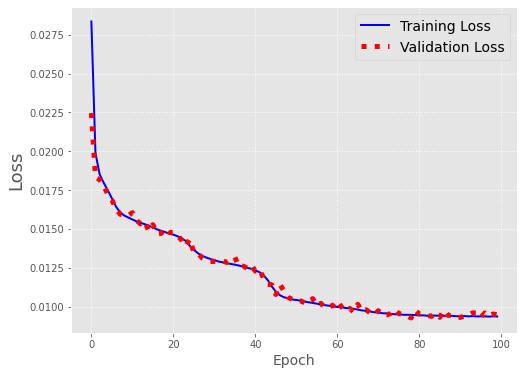

In [92]:
fig, ax = plt.subplots(figsize=(8,6)) # create a new figure with a default 111 subplot
ax.plot(running_loss_history, linewidth=2, color='b', label='Training Loss');
ax.plot(val_running_loss_history, linewidth=5, color='r', linestyle = ':', label='Validation Loss');
ax.grid(linestyle=':', linewidth=1)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=18)
plt.legend(framealpha=1, frameon=True,loc='upper right', fontsize=14, scatterpoints=1, ncol=1, markerscale=2);
torch.save(model.state_dict(), 'model-800.pkl')

In [0]:
def simulate(xs0,sys,model):
    x1=xs0.reshape(1,6)
    states0=[]
    inputs0=[]
    Ts=0.01
    
    for ind in range(400):
        x=x1
        x = Variable(torch.from_numpy(x))
        x=x.float()
        y=model(x)
        u=y.reshape(2,1)
        x=x.reshape(6,1)
        k1 = model_dynamics(x,u,sys) 
        k1 = model_dynamics(x,u,sys) 
        k2 = model_dynamics(x + (Ts/2)*k1,u,sys)         
        k3 = model_dynamics(x + (Ts/2)*k2,u,sys)        
        k4 = model_dynamics(x+Ts*k3,u,sys)        
        x1 = x + Ts*(k1 + 2*k2 + 2*k3 + k4)/6
        x1=x1.reshape(1,6)
        x1=np.array(x1)
        states0.append(x)
        inputs0.append(u)
    return states0, inputs0

In [0]:
import random

In [0]:
num=random.randint(0,100)
xs=nsarr[num,0,:]
statesone=nsarr[num,:,:]
controlsone=noarr[num,:,:]

In [100]:
model

FNN(
  (linear1): Linear(in_features=6, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=128, bias=True)
  (linear4): Linear(in_features=128, out_features=2, bias=True)
)

In [0]:
import math

In [0]:
state0,inputs0=simulate(xs, sys,model.cpu())
state1=[t.numpy() for t in state0]
inputs0=[t.cpu().detach().numpy() for t in inputs0]
states_0=np.array(state1)
inputs_0=np.array(inputs0)
states_0.reshape(400,6);
inputs_0.reshape(400,2);



In [0]:
import matplotlib.pyplot as plt


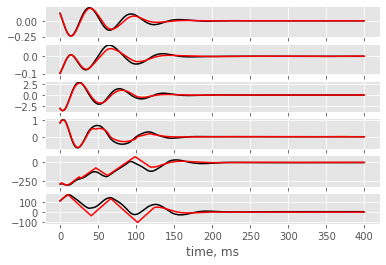

In [104]:
plt.subplot(611)
plt.plot(range(400),states_0[:,0],'k-')
plt.plot(range(401),statesone[:,0],'r-')
plt.subplot(612)
plt.plot(range(400),states_0[:,1],'k-')
plt.plot(range(401),statesone[:,1],'r-')
plt.subplot(613)
plt.plot(range(400),states_0[:,2],'k-') 
plt.plot(range(401),statesone[:,2],'r-')
plt.subplot(614)
plt.plot(range(400),states_0[:,3],'k-')
plt.plot(range(401),statesone[:,3],'r-')
plt.subplot(615)
plt.plot(range(400),states_0[:,4],'k-')
plt.plot(range(401),statesone[:,4],'r-')
plt.subplot(616)
plt.plot(range(400), states_0[:,5],'k-')
plt.plot(range(401),statesone[:,5],'r-')
plt.xlabel('time, ms')
plt.show()

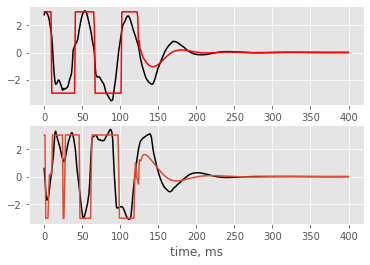

In [105]:
plt.subplot(211)
plt.plot(range(400),inputs_0[:,0],'k-')
plt.plot(range(401),controlsone[:,0],'r-')
plt.subplot(212)
plt.plot(range(400), inputs_0[:,1],'k-') 
plt.plot(range(401),controlsone[:,1])
plt.xlabel('time, ms')
plt.show()

In [0]:
Q=np.eye(6)
R=np.eye(2)

In [0]:
import math

In [0]:
Q[0,0]=50000
Q[1,1]=50000
Q[2,2]=500
Q[3,3]=100
Q[4,4]=0.01
Q[5,5]=0.01
R[0,0]=10**(-5)
R[1,1]=10**(-5)

In [0]:
sum=[]
for j in range(100):
    cost=0
    for i in range(400):
        one=nsarr[j,i,:].reshape(1,6)
        two=noarr[j,i,:].reshape(1,2)
        cost=cost+np.matmul(one,np.matmul(Q,np.transpose(one)))+np.matmul(two,np.matmul(R,np.transpose(two)))
    sum.append(cost)

In [0]:
sum_NN=[]
for j in range(100):
    cost=0
    xs00=nsarr[j,0,:]
    xs=xs00.reshape(1,6)
    xs=np.array(xs)
    state0,inputs0=simulate(xs, sys,model)
    state1=[t.numpy() for t in state0]
    inputs0=[t.cpu().detach().numpy() for t in inputs0]
    states0=np.array(state1)
    inputs0=np.array(inputs0)
    states0.reshape(400,6)
    inputs0.reshape(400,2)
    for i in range(400):
        one=states0[i,:].reshape(1,6)
        two=inputs0[i,:].reshape(1,2)
        cost=cost+np.matmul(one,np.matmul(Q,np.transpose(one)))+np.matmul(two,np.matmul(R,np.transpose(two)))
    sum_NN.append(cost)

In [111]:
sum1=np.array(sum_NN)
sum2=np.array(sum)
sum1[num], sum2[num]

(array([[310129.26216085]]), array([[267564.416046]]))